In [6]:
from keras.layers import Input, Dense
from keras.models import Model

In [2]:
Dense

keras.layers.core.Dense

In [4]:
encoding_dim = 16

In [60]:
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [61]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [62]:
encoder = Model(input_img, encoded)

In [63]:
encoded_layer = Input(shape=(encoding_dim,))
decoder = Model(encoded_layer, autoencoder.layers[-1](encoded_layer))

In [16]:
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [13]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train = x_train.reshape((60000, 28*28))

In [20]:
x_test = x_test.reshape((10000, 28*28))

In [76]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1393 - val_loss: 0.1381
Epoch 2/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1392 - val_loss: 0.1374
Epoch 3/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1389 - val_loss: 0.1377
Epoch 4/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1390 - val_loss: 0.1385
Epoch 5/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1386 - val_loss: 0.1375
Epoch 6/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1385 - val_loss: 0.1368
Epoch 7/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1384 - val_loss: 0.1373
Epoch 8/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1382 - val_loss: 0.1372
Epoch 9/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1382 - val_loss: 0.1366
Epoch

In [77]:
decoded_imgs = autoencoder.predict(x_test)

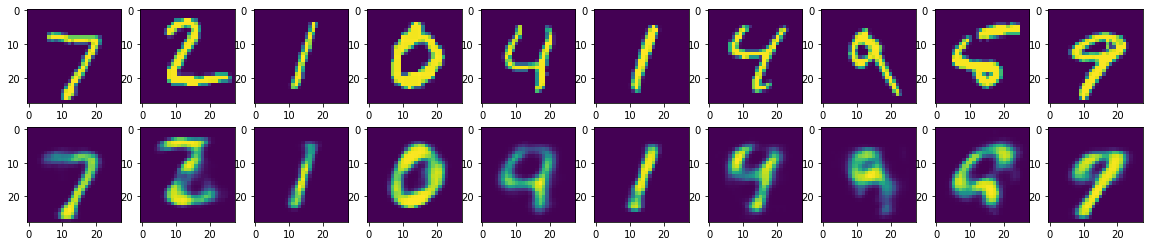

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].reshape((28, 28)))
    
    ax = plt.subplot(2, 10, i+1+10)
    plt.imshow(decoded_imgs[i].reshape((28, 28)))

In [79]:
encoded_img = encoder.predict(x_test)

In [80]:
from sklearn.cluster import KMeans

In [81]:
km_model = KMeans(n_clusters=10).fit(encoded_img)

In [82]:
import pandas

In [83]:
data = pandas.DataFrame({'true labels': y_test, 'pred labels': km_model.labels_})

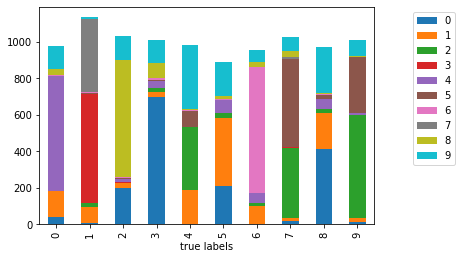

In [84]:
data.groupby(['true labels', 'pred labels']).size().unstack().plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.1, 1))

In [85]:
decoded_centers = decoder.predict(km_model.cluster_centers_)

In [86]:
decoded_centers.shape

(10, 784)

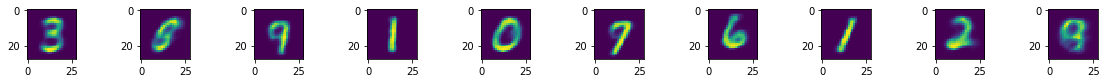

In [87]:
plt.figure(figsize=(20, 2))
for i in range(decoded_centers.shape[0]):
    ax = plt.subplot(2, 10, i+1)
    plt.imshow(decoded_centers[i].reshape((28, 28)))